In [37]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy import *

$\color{purple}{\text{I have to check convergence for:}}$
* 4th order finite difference -> $\color{red}{\text{it's ok, I think the south pole is a bit problematic}}$
* RK4
* Extrapolation

## $\color{maroon}{\text{FINITE DIFFERENCE 4TH ORDER}}$

the stencils are taken from:
https://web.media.mit.edu/~crtaylor/calculator.html

In [38]:
def deriv1(f,dx):
    df = -(1*np.roll(f,-2)-8*np.roll(f,-1)+8*np.roll(f,1)-1*np.roll(f,2))/(12*1.0*dx**1)
    df[0] = (-25*f[0]+48*f[1]-36*f[2]+16*f[3]-3*f[4])/(12*1.0*dx*1)
    df[1] = (-3*f[0]-10*f[1]+18*f[2]-6*f[3]+1*f[4])/(12*1.0*dx*1)
    df[-2] = (-1*f[-5]+6*f[-4]-18*f[-3]+10*f[-2]+3*f[-1])/(12*1.0*dx*1)
    df[-1] = (3*f[-5]-16*f[-4]+36*f[-3]-48*f[-2]+25*f[-1])/(12*1.0*dx**1)
    return df

def deriv2(f,dx):
    ddf = (-1*np.roll(f,-2)+16*np.roll(f,-1)-30*f+16*np.roll(f,1)-1*np.roll(f,2))/(12*dx**2)
    ddf[0] = (35*f[0]-104*f[1]+114*f[2]-56*f[3]+11*f[4])/(12*1.0*dx**2)
    ddf[1] = (11*f[0]-20*f[1]+6*f[2]+4*f[3]-1*f[4])/(12*1.0*dx**2)
    ddf[-2] = (-1*f[-5]+4*f[-4]+6*f[-3]-20*f[-2]+11*f[-1])/(12*1.0*dx**2)
    ddf[-1] = (11*f[-5]-56*f[-4]+114*f[-3]-104*f[-2]+35*f[-1])/(12*1.0*dx**2)
    return ddf

In [39]:
def testfd(x):
    return x**3+x*np.cos(x)

In [40]:
x1,dx1 = np.linspace(0,10,250,retstep=True)
x2,dx2 = np.linspace(0,10,500,retstep=True)
x3,dx3 = np.linspace(0,10,750,retstep=True)
x4,dx4 = np.linspace(0,10,1000,retstep=True)

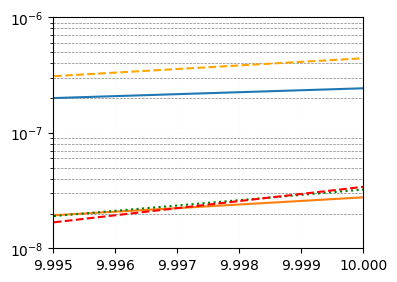

In [41]:
fig = plt.figure(figsize=(4, 3))
plt.plot(x1,np.abs(deriv1(testfd(x1),dx1)-(3*x1**2+np.cos(x1)-x1*np.sin(x1))))
plt.plot(x2,np.abs(deriv1(testfd(x2),dx2)-(3*x2**2+np.cos(x2)-x2*np.sin(x2))))
plt.plot(x2,2**4*np.abs(deriv1(testfd(x2),dx2)-(3*x2**2+np.cos(x2)-x2*np.sin(x2))), color="orange", linestyle='dashed')
plt.plot(x3,np.abs(deriv1(testfd(x3),dx3)-(3*x3**2+np.cos(x3)-x3*np.sin(x3))))
plt.plot(x3,(dx2/dx3)**4*np.abs(deriv1(testfd(x3),dx3)-(3*x3**2+np.cos(x3)-x3*np.sin(x3))), color="green", linestyle='dotted')
plt.plot(x4,np.abs(deriv1(testfd(x4),dx4)-(3*x4**2+np.cos(x4)-x4*np.sin(x4))))
plt.plot(x4,2**4*np.abs(deriv1(testfd(x4),dx4)-(3*x4**2+np.cos(x4)-x4*np.sin(x4))),color="red", linestyle='dashed')
plt.yscale('log')
plt.grid(True, alpha=0.03)  # Enable grid and set transparency to 0.3
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')  # Customize gridlines
plt.xlim(9.995,10)
plt.ylim(10**(-8),10**(-6))
plt.show()

In [42]:
np.abs(deriv1(testfd(x1),dx1)-(3*x1**2+np.cos(x1)-x1*np.sin(x1)))[-1]/np.abs(deriv1(testfd(x2),dx2)-(3*x2*2*2+np.cos(x2)-x2*np.sin(x2)))[-1]

1.348771169032972e-09

In [43]:
(dx2/dx1)**4

0.06200050200299998

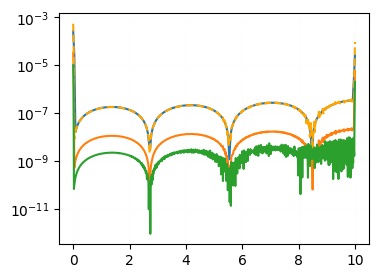

In [44]:
fig = plt.figure(figsize=(4, 3))
plt.plot(x1,np.abs(deriv2(testfd(x1),dx1)-(6*x1 - x1 * np.cos(x1) - 2 * np.sin(x1))))
plt.plot(x2,np.abs(deriv2(testfd(x2),dx2)-(6*x2 - x2 * np.cos(x2) - 2 * np.sin(x2))))
plt.plot(x2,2**4*np.abs(deriv2(testfd(x2),dx2)-(6*x2 - x2 * np.cos(x2) - 2 * np.sin(x2))), color="orange", linestyle='dashed')
plt.plot(x3,np.abs(deriv2(testfd(x3),dx3)-(6*x3 - x3 * np.cos(x3) - 2 * np.sin(x3))))
#plt.plot(x3,(dx2/dx3)**4*np.abs(deriv2(testfd(x3),dx3)-(6*x3 - x3 * np.cos(x3) - 2 * np.sin(x3))), color="green", linestyle='dotted')
#plt.plot(x4,np.abs(deriv2(testfd(x4),dx4)-(6*x4 - x4 * np.cos(x4) - 2 * np.sin(x4))))
#plt.plot(x4,2**4*np.abs(deriv2(testfd(x4),dx4)-(6*x4 - x4 * np.cos(x4) - 2 * np.sin(x4))),color="red", linestyle='dashed')
plt.yscale('log')
plt.grid(True, alpha=0.03)  # Enable grid and set transparency to 0.3
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')  # Customize gridlines

plt.show()

In [45]:
def testfd(x):
    return 10*np.cos(x)

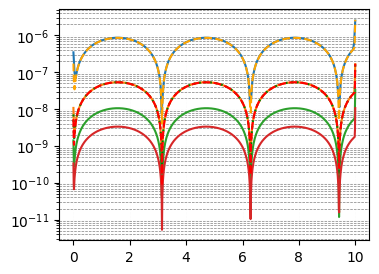

In [46]:
fig = plt.figure(figsize=(4, 3))
plt.plot(x1,np.abs(deriv1(testfd(x1),dx1)-(-10*np.sin(x1))))
plt.plot(x2,np.abs(deriv1(testfd(x2),dx2)-(-10*np.sin(x2))))
plt.plot(x2,2**4*np.abs(deriv1(testfd(x2),dx2)-(-10*np.sin(x2))), color="orange", linestyle='dashed')
plt.plot(x3,np.abs(deriv1(testfd(x3),dx3)-(-10*np.sin(x3))))
plt.plot(x3,(dx2/dx3)**4*np.abs(deriv1(testfd(x3),dx3)-(-10*np.sin(x3))), color="green", linestyle='dotted')
plt.plot(x4,np.abs(deriv1(testfd(x4),dx4)-(-10*np.sin(x4))))
plt.plot(x4,2**4*np.abs(deriv1(testfd(x4),dx4)-(-10*np.sin(x4))),color="red", linestyle='dashed')
plt.yscale('log')
plt.grid(True, alpha=0.03)  # Enable grid and set transparency to 0.3
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')  # Customize gridlines

plt.show()

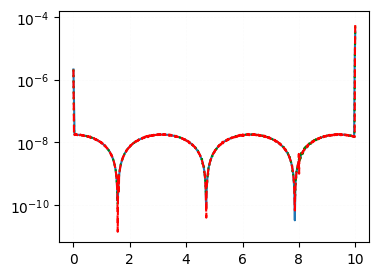

In [47]:
fig = plt.figure(figsize=(4, 3))
#plt.plot(x1,np.abs(deriv2(testfd(x1),dx1)-(-10*np.cos(x1))))
plt.plot(x2,np.abs(deriv2(testfd(x2),dx2)-(-10*np.cos(x2))))
#plt.plot(x2,2**4*np.abs(deriv2(testfd(x2),dx2)-(-10*np.cos(x2))), color="orange", linestyle='dashed')
#plt.plot(x3,np.abs(deriv2(testfd(x3),dx3)-(-10*np.cos(x3))))
plt.plot(x3,(dx2/dx3)**4*np.abs(deriv2(testfd(x3),dx3)-(-10*np.cos(x3))), color="green", linestyle='dotted')
#plt.plot(x4,np.abs(deriv2(testfd(x4),dx4)-(-10*np.cos(x4))))
plt.plot(x4,2**4*np.abs(deriv2(testfd(x4),dx4)-(-10*np.cos(x4))),color="red", linestyle='dashed')
plt.yscale('log')
plt.grid(True, alpha=0.03)  # Enable grid and set transparency to 0.3
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')  # Customize gridlines

plt.show()

## $\color{maroon}{\text{RK4}}$

Problem:
$$
{\Box}^2\phi(t)=-cost \Rightarrow \frac{1}{\sqrt{-g}} \partial_{\mu}\big( \sqrt{-g} g^{\mu \nu} \partial_{\nu}\phi(t) \big)=-cost \Rightarrow \partial_t^2\phi(t)=cost
$$


where,

$$
ds^2 = - dt^2 + R^2 (d\chi^2 + sin^2\chi d\theta^2 + sin^2\chi sin^2\theta d\phi^2 )
$$

altough in this example we have the homogeneous case

In [48]:
# initial conditions
A = 1
B = 1
def phi0(t):
    return A +0*t

def dphi0(t):
    return B + 0*t

In [49]:
x1,dx1 = np.linspace(0,2*np.pi,101,retstep=True)
x2,dx2 = np.linspace(0,2*np.pi,201,retstep=True)
x3,dx3 = np.linspace(0,2*np.pi,401,retstep=True)
x4,dx4 = np.linspace(0,2*np.pi,801,retstep=True)

t1,dt1 = np.linspace(0,10,201,retstep=True)
t2,dt2 = np.linspace(0,10,401,retstep=True)
t3,dt3 = np.linspace(0,10,801,retstep=True)
t4,dt4 = np.linspace(0,10,1601,retstep=True)

In [50]:
# to store u(x,t)
sol1 = [np.zeros((len(t1))),np.zeros((len(t1)))]
sol2 = [np.zeros((len(t2))),np.zeros((len(t2)))]
sol3 = [np.zeros((len(t3))),np.zeros((len(t3)))]
sol4 = [np.zeros((len(t4))),np.zeros((len(t4)))]

In [51]:
sol1[0][0] = phi0(t1[0])
sol1[1][0] = dphi0(t1[0])

sol2[0][0] = phi0(t2[0])
sol2[1][0] = dphi0(t2[0])

sol3[0][0] = phi0(t3[0])
sol3[1][0] = dphi0(t3[0])

sol4[0][0] = phi0(t4[0])
sol4[1][0] = dphi0(t4[0])

In [52]:
def rk4step(sol,t, dt): 
    for i in range(1,len(t)):
        k1 = [sol[1][i-1],np.cos(t[i-1])]
        k2 = [sol[1][i-1] + dt/2*k1[1] , np.cos(t[i-1]+dt/2)]
        k3 = [sol[1][i-1] + dt/2*k2[1] , np.cos(t[i-1]+dt/2)]
        k4 = [sol[1][i-1] + dt*k3[1] , np.cos(t[i-1]+dt)]
        
        sol[0][i] = sol[0][i-1] + dt/6*(k1[0] + 2*k2[0] +2*k3[0]+k4[0])
        sol[1][i] = sol[1][i-1] + dt/6*(k1[1] + 2*k2[1] +2*k3[1]+k4[1])
    return sol

In [53]:
rk4step(sol1,t1,dt1);

In [54]:
rk4step(sol2,t2,dt2);
rk4step(sol3,t3,dt3);
rk4step(sol4,t4,dt4);

In [55]:
def phit(t):
    return -np.cos(t) + t + 2
def dphit(t):
    return np.sin(t) +1

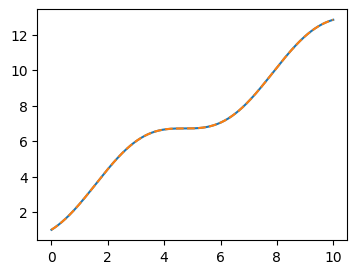

In [56]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t2,sol2[0])
plt.plot(t2,phit(t2),linestyle='dashed')

In [57]:
er1 = np.abs(sol1[0]-phit(t1))
er2 = np.abs(sol2[0]-phit(t2))
er3 = np.abs(sol3[0]-phit(t3))
er4 = np.abs(sol4[0]-phit(t4))

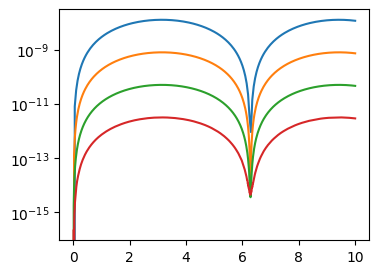

In [58]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t1,er1)
plt.plot(t2,er2)
plt.plot(t3,er3)
plt.plot(t4,er4)
plt.yscale('log')

In [59]:
e1 = np.abs(sol1[1]-dphit(t1))
e2 = np.abs(sol2[1]-dphit(t2))
e3 = np.abs(sol3[1]-dphit(t3))
e4 = np.abs(sol4[1]-dphit(t4))

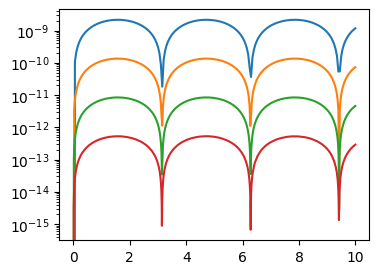

In [60]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t1,e1)
plt.plot(t2,e2)
plt.plot(t3,e3)
plt.plot(t4,e4)
plt.yscale('log')

Problem:
$$
{\Box}^2\phi(t)=\phi \Rightarrow \frac{1}{\sqrt{-g}} \partial_{\mu}\big( \sqrt{-g} g^{\mu \nu} \partial_{\nu}\phi(t) \big)=\phi \Rightarrow \partial_t^2\phi(t)=-\phi(t)
$$


where,

$$
ds^2 = - dt^2 + R^2 (d\chi^2 + sin^2\chi d\theta^2 + sin^2\chi sin^2\theta d\phi^2 )
$$

the solution is:
$$
\phi(t) = C_1 cos(t) +C_2 sin(t) 
$$

In [61]:
# initial conditions
A = 1
B = 0
def phi0(t):
    return A +0*t

def dphi0(t):
    return B + 0*t

In [62]:
t1,dt1 = np.linspace(0,10,201,retstep=True)
t2,dt2 = np.linspace(0,10,401,retstep=True)
t3,dt3 = np.linspace(0,10,801,retstep=True)
t4,dt4 = np.linspace(0,10,1601,retstep=True)

In [63]:
# to store u(x,t)
sol1 = [np.zeros((len(t1))),np.zeros((len(t1)))]
sol2 = [np.zeros((len(t2))),np.zeros((len(t2)))]
sol3 = [np.zeros((len(t3))),np.zeros((len(t3)))]
sol4 = [np.zeros((len(t4))),np.zeros((len(t4)))]

In [64]:
sol1[0][0] = phi0(t1[0])
sol1[1][0] = dphi0(t1[0])

sol2[0][0] = phi0(t2[0])
sol2[1][0] = dphi0(t2[0])

sol3[0][0] = phi0(t3[0])
sol3[1][0] = dphi0(t3[0])

sol4[0][0] = phi0(t4[0])
sol4[1][0] = dphi0(t4[0])

In [65]:
def rk4step(sol,t, dt): 
    for i in range(1,len(t)):
        k1 = [sol[1][i-1],-sol[0][i-1]]
        k2 = [sol[1][i-1] + dt/2*k1[1] , -(sol[0][i-1]+dt/2*k1[0])]
        k3 = [sol[1][i-1] + dt/2*k2[1] , -(sol[0][i-1]+dt/2*k2[0])]
        k4 = [sol[1][i-1] + dt*k3[1] , -(sol[0][i-1]+dt*k3[0])]
        
        sol[0][i] = sol[0][i-1] + dt/6*(k1[0] + 2*k2[0] +2*k3[0]+k4[0])
        sol[1][i] = sol[1][i-1] + dt/6*(k1[1] + 2*k2[1] +2*k3[1]+k4[1])
    return sol

In [66]:
rk4step(sol1,t1,dt1);

In [67]:
rk4step(sol2,t2,dt2);
rk4step(sol3,t3,dt3);
rk4step(sol4,t4,dt4);

In [68]:
def phit(t):
    return np.cos(t) 
def dphit(t):
    return -np.sin(t) 

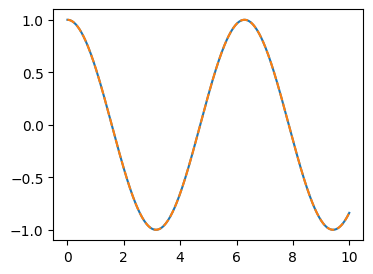

In [69]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t2,sol2[0])
plt.plot(t2,phit(t2),linestyle='dashed')

In [70]:
er1 = np.abs(sol1[0]-phit(t1))
er2 = np.abs(sol2[0]-phit(t2))
er3 = np.abs(sol3[0]-phit(t3))
er4 = np.abs(sol4[0]-phit(t4))

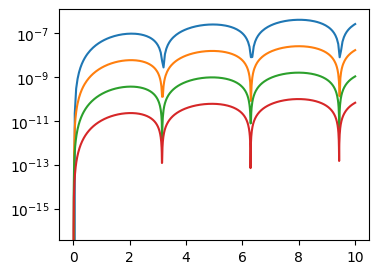

In [71]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t1,er1)
plt.plot(t2,er2)
plt.plot(t3,er3)
plt.plot(t4,er4)
plt.yscale('log')

In [72]:
e1 = np.abs(sol1[1]-dphit(t1))
e2 = np.abs(sol2[1]-dphit(t2))
e3 = np.abs(sol3[1]-dphit(t3))
e4 = np.abs(sol4[1]-dphit(t4))

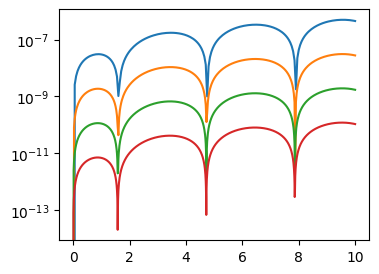

In [73]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t1,e1)
plt.plot(t2,e2)
plt.plot(t3,e3)
plt.plot(t4,e4)
plt.yscale('log')

## $\color{maroon}{\text{Extrapolation}}$

If initially I have the function:
$
f(x) 
$
defined on $[0,\pi]$

I will use 4 resolutions and extrapolate its value on the poles and see the order of accuracy.I will use the approximation:
$$
f(x) \simeq A + Bx + C x^2 + D x^3
$$

BUT for $\partial_x f(x_p)=0$, so for the north pole:

$$
f(0) \simeq A 
$$

and for the south pole:
$$
f(\pi) \simeq A '-\pi^2(2 C' + 3 D' \pi)  + C' \pi^2 + D' \pi^3
$$

why for finer resolutions the order of convergence diverges????
[see below]

In [74]:
# x includes the point to extrapolate and 3 neighboring points
# make sure that they are ordered as x[0] the extrapolating point
def extr(x,y):
    A = np.array([[0, 1, 2*x[0], 3*x[0]**2],
              [1, x[1], x[1]**2, x[1]**3],
              [1, x[2], x[2]**2, x[2]**3],
              [1, x[3], x[3]**2, x[3]**3]])

    B = np.array([0,
              y[1],
              y[2],
              y[3]])

    X = np.linalg.solve(A, B)
    b = X[0] + X[1]*x[0] + X[2]*x[0]**2 + X[3]*x[0]**3
    return b

### test no.1 : f(x)=10cosx

In [75]:
x1,dx1 = np.linspace(0,np.pi,101,retstep=True)
x2,dx2 = np.linspace(0,np.pi,201,retstep=True)
x3,dx3 = np.linspace(0,np.pi,401,retstep=True)
x4,dx4 = np.linspace(0,np.pi,801,retstep=True)
x5,dx5 = np.linspace(0,np.pi,1601,retstep=True)
x6,dx6 = np.linspace(0,np.pi,3201,retstep=True)

In [76]:
#def test1(x):
#    return 10*np.cos(x)

In [77]:
def test1(x):
    return np.exp(np.cos(x))

In [78]:
y1 = test1(x1)
y2 = test1(x2)
y3 = test1(x3)
y4 = test1(x4)
y5 = test1(x5)
y6 = test1(x6)

In [79]:
y1[0]=extr(x1[:4],y1[:4])
y2[0]=extr(x2[:4],y2[:4])
y3[0]=extr(x3[:4],y3[:4])
y4[0]=extr(x4[:4],y4[:4])
y5[0]=extr(x5[:4],y5[:4])
y6[0]=extr(x6[:4],y6[:4])

In [80]:
er1 = np.abs(test1(0)-y1[0])
er2 = np.abs(test1(0)-y2[0])
er3 = np.abs(test1(0)-y3[0])
er4 = np.abs(test1(0)-y4[0])
er5 = np.abs(test1(0)-y5[0])
er6 = np.abs(test1(0)-y6[0])

In [81]:
er1/er2,er2/er3,er3/er4,er4/er5,er5/er6

(15.923636418663504,
 15.980883528115136,
 15.995269056657959,
 15.998428211586901,
 15.997743391360412)

In [82]:
y1[-1]=extr(x1[-4:][::-1],y1[-4:][::-1])
y2[-1]=extr(x2[-4:][::-1],y2[-4:][::-1])
y3[-1]=extr(x3[-4:][::-1],y3[-4:][::-1])
y4[-1]=extr(x4[-4:][::-1],y4[-4:][::-1])
y5[-1]=extr(x5[-4:][::-1],y5[-4:][::-1])
y6[-1]=extr(x6[-4:][::-1],y6[-4:][::-1])

In [83]:
y3[-1]

0.3678794415532154

In [84]:
er1 = np.abs(test1(np.pi)-y1[-1])
er2 = np.abs(test1(np.pi)-y2[-1])
er3 = np.abs(test1(np.pi)-y3[-1])
er4 = np.abs(test1(np.pi)-y4[-1])
er5 = np.abs(test1(np.pi)-y5[-1])
er6 = np.abs(test1(np.pi)-y6[-1])

In [85]:
er1/er2,er2/er3,er3/er4,er4/er5,er5/er6

(16.00487780099262,
 16.00121397427026,
 16.000267547012662,
 16.002047578273334,
 15.998213222156044)

In [86]:
er1 = np.abs(test1(0)-y1[0])
er2 = np.abs(test1(0)-y2[0])
er3 = np.abs(test1(0)-y3[0])
er4 = np.abs(test1(0)-y4[0])
er5 = np.abs(test1(0)-y5[0])
er6 = np.abs(test1(0)-y6[0])

In [87]:
er1/er2,er2/er3,er3/er4,er4/er5,er5/er6

(15.923636418663504,
 15.980883528115136,
 15.995269056657959,
 15.998428211586901,
 15.997743391360412)

### test no.1 : f(x)=10cosx + 8 x^3 (only for x=0)

In [88]:
def test2(x):
    return 10*np.cos(x) + 8*x**3

In [89]:
y1 = test2(x1)
y2 = test2(x2)
y3 = test2(x3)
y4 = test2(x4)
y5 = test2(x5)
y6 = test2(x6)

In [90]:
y1[0]=extr(x1[:4],y1[:4])
y2[0]=extr(x2[:4],y2[:4])
y3[0]=extr(x3[:4],y3[:4])
y4[0]=extr(x4[:4],y4[:4])
y5[0]=extr(x5[:4],y5[:4])
y6[0]=extr(x6[:4],y6[:4])

In [91]:
y1[0]

10.000001327213534

In [92]:
er1 = np.abs(test2(0)-y1[0])
er2 = np.abs(test2(0)-y2[0])
er3 = np.abs(test2(0)-y3[0])
er4 = np.abs(test2(0)-y4[0])
er5 = np.abs(test2(0)-y5[0])
er6 = np.abs(test2(0)-y6[0])

In [93]:
er1/er2,er2/er3,er3/er4,er4/er5,er5/er6

(15.990130654676026,
 15.997517484768018,
 15.999539869739314,
 15.998334939970205,
 16.004207573632538)

In [94]:
def test2(x):
    return 10*np.cos(x) + 8*x**3 - 24*np.pi**2*x

In [95]:
x1,dx1 = np.linspace(0,np.pi,101,retstep=True)
x2,dx2 = np.linspace(0,np.pi,201,retstep=True)
x3,dx3 = np.linspace(0,np.pi,401,retstep=True)
x4,dx4 = np.linspace(0,np.pi,801,retstep=True)
x5,dx5 = np.linspace(0,np.pi,1601,retstep=True)
x6,dx6 = np.linspace(0,np.pi,3201,retstep=True)

In [96]:
y1 = test2(x1)
y2 = test2(x2)
y3 = test2(x3)
y4 = test2(x4)
y5 = test2(x5)
y6 = test2(x6)

In [97]:
y1[-1]

-506.100426884797

In [98]:
extr(x1[-4:][::-1],y1[-4:][::-1])

-506.1004282120107

In [99]:
y1[-1]=extr(x1[-4:][::-1],y1[-4:][::-1])
y2[-1]=extr(x2[-4:][::-1],y2[-4:][::-1])
y3[-1]=extr(x3[-4:][::-1],y3[-4:][::-1])
y4[-1]=extr(x4[-4:][::-1],y4[-4:][::-1])
y5[-1]=extr(x5[-4:][::-1],y5[-4:][::-1])
y6[-1]=extr(x6[-4:][::-1],y6[-4:][::-1])

In [100]:
y1[-1]

-506.1004282120107

In [101]:
test2(np.pi)

-506.100426884797

In [102]:
er1 = np.abs(test2(np.pi)-y1[-1])
er2 = np.abs(test2(np.pi)-y2[-1])
er3 = np.abs(test2(np.pi)-y3[-1])
er4 = np.abs(test2(np.pi)-y4[-1])
er5 = np.abs(test2(np.pi)-y5[-1])
er6 = np.abs(test2(np.pi)-y6[-1])

In [103]:
er1/er2,er2/er3,er3/er4,er4/er5,er5/er6

(15.990125928989965, 15.997151558973684, 15.996845425867507, 15.85, 18.0)

er5/er6???????? higher order convergence because of very fine resolutions?


## RK4

In [104]:
fields = ["phi", "phi_t"]
Nfields = len(fields)
d = dict()
for n in range(Nfields):
    d[fields[n]] = n 

In [105]:
class evolve(object):
    def __init__(self, N, R,T):
        self._N = N  # number of spatial grid points
        self._t = 0.0 #initial time
        self._R = R # radius of the sphere
        self._T = T # total time
        self._x = np.linspace(0,np.pi,N) 
        self._dx = self._x[1]-self._x[0]
        self._dt = 0.5*self._dx 
        self._evoVars = np.zeros([Nfields, N]) # rows equal to the number of evolution variables and columns equal to the space points. 
        self._initcond(self._evoVars)  # initiate initial conditions
        self._evoVars_initial = np.copy(self._evoVars)  # Store initial values
        self._evoVars_x = np.zeros([Nfields, N])
        self._evoVars_xx = np.zeros([Nfields, N])
        self._evoVars_x,self._evoVars_xx=self._SpatialDerivs(self._evoVars)
        self._evoVars_t = self._getTimeDeriv(self._evoVars) 
        #self._error = np.zeros([Nfields, N])
        #self._initerror = np.copy(self._error)
        
    def _initcond(self,evoVars):
        self._evoVars[d["phi"]] = 10*np.cos(self._x)
        self._evoVars[d["phi_t"]] = 0*self._x        
        
    def _SpatialDerivs(self, evoVars):
        evoVars_x = np.zeros_like(evoVars) #First deriv. w.r.t.x 
        evoVars_xx = np.zeros_like(evoVars) #Second deriv. w.r.t. x
        for n in range(Nfields):
            evoVars_x[n] = deriv1(evoVars[n], self._dx)
            evoVars_xx[n] = deriv2(evoVars[n], self._dx)
        return evoVars_x,evoVars_xx
             
    def _getTimeDeriv(self, evoVars):
        evoVars_t = np.zeros_like(evoVars) #rows equal to the number of evolution variables and columns equal to the space points. So it stores the field configurations after one time step

        #First and second spatial derivatives 
        (evoVars_x, evoVars_xx) = self._SpatialDerivs(evoVars)
        evoVars_t[d["phi"]] = evoVars[d["phi_t"]]
        evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]
        #evoVars_t[d["phi_t"]][0] = extr(self._x[:4],evoVars_t[d["phi_t"]][:4])
        #evoVars_t[d["phi_t"]][-1] = extr(self._x[-4:][::-1],evoVars_t[d["phi_t"]][-4:][::-1])
        return (evoVars_t) 
        
        
        
    def _RK4step(self):
    # Fourth order Runge Kutta
        facRK4 = [1.0/6, 1.0/3, 1.0/3, 1.0/6]
        dtRK4 = [0.5, 0.5, 1.0]
        evoVars_np1 = 1.0*self._evoVars
        ps = np.zeros_like(evoVars_np1)
        for nstep in range(4):
            evoVars_t = self._getTimeDeriv(evoVars_np1)
            
            ps += facRK4[nstep]*evoVars_t 
            if (nstep<3):
                evoVars_np1 = self._evoVars + dtRK4[nstep]*self._dt*evoVars_t
                evoVars_np1[0,0] = extr(self._x[:4],evoVars_np1[0,:4])
                evoVars_np1[0,-1] = extr(self._x[-4:][::-1],evoVars_np1[0,-4:][::-1])
                evoVars_np1[1,0] = extr(self._x[:4],evoVars_np1[1][:4])
                evoVars_np1[1,-1] = extr(self._x[-4:][::-1],evoVars_np1[1,-4:][::-1])
            else:   
                evoVars_np1 = self._evoVars + self._dt*ps
                evoVars_np1[0,0] = extr(self._x[:4],evoVars_np1[0,:4])
                evoVars_np1[0,-1] = extr(self._x[-4:][::-1],evoVars_np1[0,-4:][::-1])
                evoVars_np1[1,0] = extr(self._x[:4],evoVars_np1[1,:4])
                evoVars_np1[1,-1] = extr(self._x[-4:][::-1],evoVars_np1[1,-4:][::-1])
        self._evoVars = 1.0*evoVars_np1
        self._evoVars_x,self._evoVars_xx=self._SpatialDerivs(self._evoVars)
        self._t += self._dt


In [106]:
R = 2

In [107]:
T = 4 * np.pi * R / np.sqrt(3)

In [108]:
A = 10

In [109]:
# for this example, the real solution and the involved derivatives
def f_sol(x,t):
    return A*np.cos(x)*np.cos(np.sqrt(3)/R*t)

def fx_sol(x,t):
    return -A*np.sin(x)*np.cos(np.sqrt(3)/R*t)

def fxx_sol(x,t):
    return -A*np.cos(x)*np.cos(np.sqrt(3)/R*t)

def ft_sol(x,t):
    return -np.sqrt(3)/R*A*np.cos(x)*np.sin(np.sqrt(3)/R*t)

def ftt_sol(x,t):
    return -(np.sqrt(3)/R)**2*A*np.cos(x)*np.cos(np.sqrt(3)/R*t)

def ftx_sol(x,t):
    return np.sqrt(3)/R*A*np.sin(x)*np.sin(np.sqrt(3)/R*t)

def ftxx_sol(x,t):
    return np.sqrt(3)/R*A*np.cos(x)*np.sin(np.sqrt(3)/R*t)

In [110]:
wave_eq1 = evolve(201,R,T)
wave_eq2 = evolve(401,R,T)
wave_eq3 = evolve(801,R,T)
wave_eq4 = evolve(1601,R,T)
wave_eq5 = evolve(3201,R,T)

/tmp/ipykernel_2047607/1683528435.py:38: RuntimeWarning: divide by zero encountered in divide
  evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]


### After creating the instances, we are checking the initial conditions:

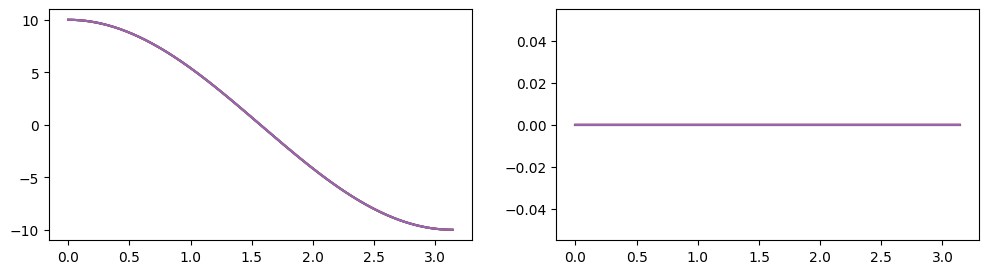

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(wave_eq1._x,wave_eq1._evoVars[0])
ax1.plot(wave_eq2._x,wave_eq2._evoVars[0])
ax1.plot(wave_eq3._x,wave_eq3._evoVars[0])
ax1.plot(wave_eq4._x,wave_eq4._evoVars[0])
ax1.plot(wave_eq4._x,f_sol(wave_eq4._x,0))

ax2.plot(wave_eq1._x,wave_eq1._evoVars[1])
ax2.plot(wave_eq2._x,wave_eq2._evoVars[1])
ax2.plot(wave_eq3._x,wave_eq3._evoVars[1])
ax2.plot(wave_eq4._x,wave_eq4._evoVars[1])
ax2.plot(wave_eq4._x,ft_sol(wave_eq4._x,0))

plt.show()

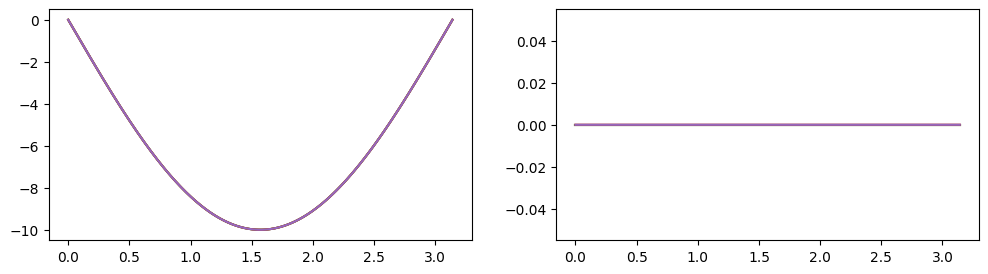

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(wave_eq1._x,wave_eq1._evoVars_x[0])
ax1.plot(wave_eq2._x,wave_eq2._evoVars_x[0])
ax1.plot(wave_eq3._x,wave_eq3._evoVars_x[0])
ax1.plot(wave_eq4._x,wave_eq4._evoVars_x[0])
ax1.plot(wave_eq4._x,fx_sol(wave_eq4._x,0))

ax2.plot(wave_eq1._x,wave_eq1._evoVars_x[1])
ax2.plot(wave_eq2._x,wave_eq2._evoVars_x[1])
ax2.plot(wave_eq3._x,wave_eq3._evoVars_x[1])
ax2.plot(wave_eq4._x,wave_eq4._evoVars_x[1])
ax2.plot(wave_eq4._x,ftx_sol(wave_eq4._x,0))

plt.show()

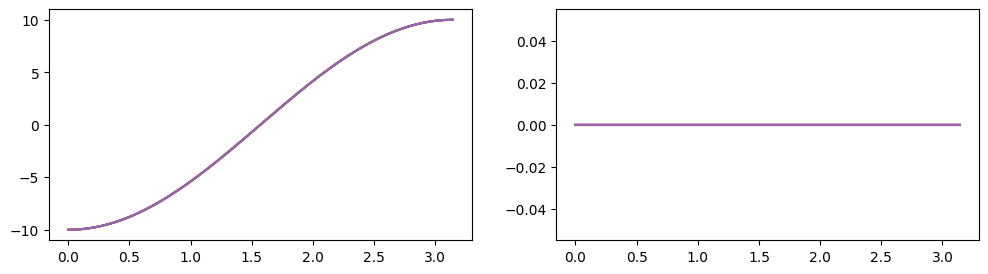

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(wave_eq1._x,wave_eq1._evoVars_xx[0])
ax1.plot(wave_eq2._x,wave_eq2._evoVars_xx[0])
ax1.plot(wave_eq3._x,wave_eq3._evoVars_xx[0])
ax1.plot(wave_eq4._x,wave_eq4._evoVars_xx[0])
ax1.plot(wave_eq4._x,fxx_sol(wave_eq4._x,0))

ax2.plot(wave_eq1._x,wave_eq1._evoVars_xx[1])
ax2.plot(wave_eq2._x,wave_eq2._evoVars_xx[1])
ax2.plot(wave_eq3._x,wave_eq3._evoVars_xx[1])
ax2.plot(wave_eq4._x,wave_eq4._evoVars_xx[1])
ax2.plot(wave_eq4._x,ftxx_sol(wave_eq4._x,0))

plt.show()

### finite difference convergence:

In [114]:
er1_fx=np.abs(wave_eq1._evoVars_x[0]-fx_sol(wave_eq1._x,0))
er2_fx=np.abs(wave_eq2._evoVars_x[0]-fx_sol(wave_eq2._x,0))
er3_fx=np.abs(wave_eq3._evoVars_x[0]-fx_sol(wave_eq3._x,0))
er4_fx=np.abs(wave_eq4._evoVars_x[0]-fx_sol(wave_eq4._x,0))
er5_fx=np.abs(wave_eq5._evoVars_x[0]-fx_sol(wave_eq5._x,0))

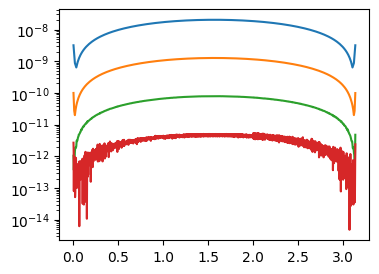

In [115]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave_eq1._x,er1_fx)
plt.plot(wave_eq2._x,er2_fx) # see the poles...
plt.plot(wave_eq3._x,er3_fx)
plt.plot(wave_eq4._x,er4_fx)
#plt.plot(wave_eq5._x,er5_fx)
plt.yscale('log')

In [116]:
er1_fxx=np.abs(wave_eq1._evoVars_xx[0]-fxx_sol(wave_eq1._x,0))
er2_fxx=np.abs(wave_eq2._evoVars_xx[0]-fxx_sol(wave_eq2._x,0))
er3_fxx=np.abs(wave_eq3._evoVars_xx[0]-fxx_sol(wave_eq3._x,0))
er4_fxx=np.abs(wave_eq4._evoVars_xx[0]-fxx_sol(wave_eq4._x,0))
er5_fxx=np.abs(wave_eq5._evoVars_xx[0]-fxx_sol(wave_eq5._x,0))

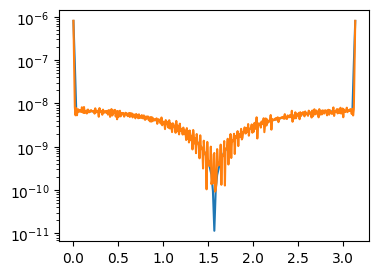

In [117]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave_eq1._x,er1_fxx)
plt.plot(wave_eq2._x,2**4*er2_fxx) # the x=π/2 ...
#plt.plot(wave_eq3._x,er3_fxx)
#plt.plot(wave_eq4._x,er4_fxx)
#plt.plot(wave_eq5._x,er5_fx)
plt.yscale('log')

### Until t=T

In [118]:
wave2 = []
while wave_eq2._t <= T:
    wave_eq2._RK4step()
    wave2.append(wave_eq2._evoVars)

/tmp/ipykernel_2047607/1683528435.py:38: RuntimeWarning: divide by zero encountered in divide
  evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]
/tmp/ipykernel_2047607/1683528435.py:54: RuntimeWarning: invalid value encountered in add
  ps += facRK4[nstep]*evoVars_t


Last time step: reproduces the correct solution!

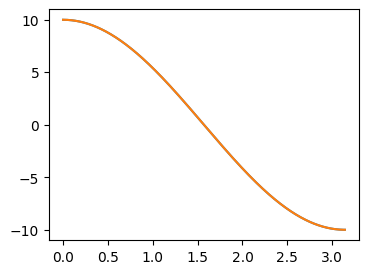

In [119]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave_eq2._x,wave_eq2._evoVars[0])
plt.plot(wave_eq2._x,f_sol(wave_eq2._x,wave_eq2._t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])

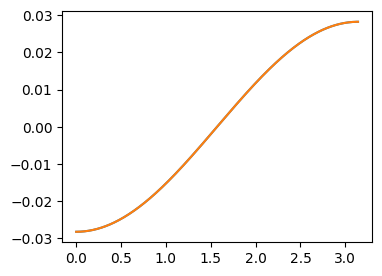

In [120]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave_eq2._x,wave_eq2._evoVars[1])
plt.plot(wave_eq2._x,ft_sol(wave_eq2._x,wave_eq2._t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])


let's check the intemediate steps:

In [121]:
wave2 = np.array(wave2)

In [122]:
wave2_t=np.arange(0,T,wave_eq2._dt)

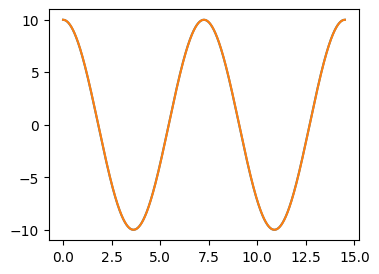

In [123]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave2_t,wave2[:,0,2])
plt.plot(wave2_t,f_sol(wave_eq2._x[2],wave2_t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])

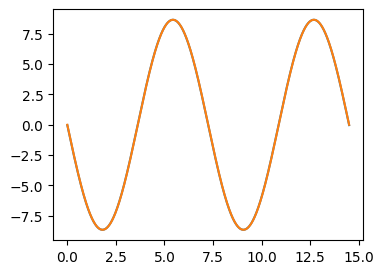

In [124]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave2_t,wave2[:,1,2])
plt.plot(wave2_t,ft_sol(wave_eq2._x[2],wave2_t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])

and the intermediate steps for the poles:

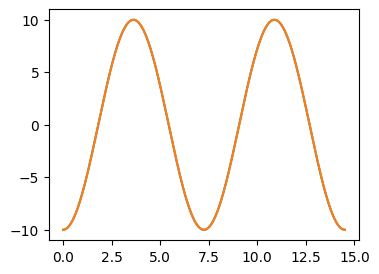

In [125]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave2_t,wave2[:,0,-1])
plt.plot(wave2_t,f_sol(wave_eq2._x[-1],wave2_t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])

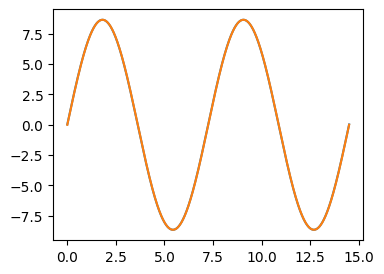

In [126]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave2_t,wave2[:,1,-1])
plt.plot(wave2_t,ft_sol(wave_eq2._x[-1],wave2_t))
#plt.ylim(wave_eq2._evoVars[1,1],wave_eq2._evoVars[1,-2])
#plt.xlim(wave_eq2._x[1],wave_eq2._x[-2])

Now, let's check energy conservation before we move on to convergence.

$$
E(t) = \int sinx^2 (f_t(x,t)^2+1/R^2 f_x(x,t)^2) dx
$$

In [127]:
e_s = np.zeros((len(wave2_t)))
for i in range(len(wave2_t)):
    e_s[i]=np.sum(np.sin(wave_eq2._x)**2*(ft_sol(wave_eq2._x,wave2_t[i])**2 + 1/R**2*deriv1(f_sol(wave_eq2._x,wave2_t[i]),wave_eq2._dx)**2))*wave_eq2._dx

In [128]:
e_n = np.zeros((len(wave2_t)))
for i in range(len(wave2_t)):
    e_n[i]=np.sum(np.sin(wave_eq2._x)**2*(wave2[i,1,:]**2 + 1/R**2*deriv1(wave2[i,0,:],wave_eq2._dx)**2))*wave_eq2._dx

(29.45, 29.46)

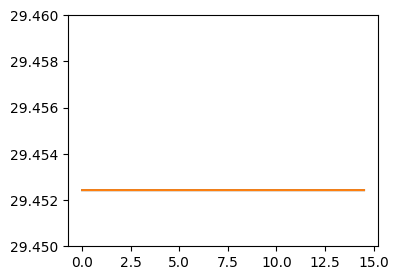

In [129]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave2_t,e_n)
plt.plot(wave2_t,e_s)
plt.ylim(29.45,29.46)

### Now let's move on to convergence

In [130]:
wave_eq1 = evolve(201,R,T)
wave_eq2 = evolve(401,R,T)
wave_eq3 = evolve(801,R,T)
wave_eq4 = evolve(1601,R,T)
wave_eq5 = evolve(3201,R,T)

/tmp/ipykernel_2047607/1683528435.py:38: RuntimeWarning: divide by zero encountered in divide
  evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]


In [131]:
wave1 = []
wave1.append(wave_eq1._evoVars)
t1 = []
t1.append(wave_eq1._t)
while wave_eq1._t <= T:
    wave_eq1._RK4step()
    wave1.append(wave_eq1._evoVars)
    t1.append(wave_eq1._t)
wave1 = np.array(wave1)
t1=np.array(t1)

wave2 = []
wave2.append(wave_eq2._evoVars)
t2 = []
t2.append(wave_eq2._t)
while wave_eq2._t <= T:
    wave_eq2._RK4step()
    wave2.append(wave_eq2._evoVars)
    t2.append(wave_eq2._t)
wave2 = np.array(wave2)
t2=np.array(t2)

wave3 = []
wave3.append(wave_eq3._evoVars)
t3 = []
t3.append(wave_eq3._t)
while wave_eq3._t <= T:
    wave_eq3._RK4step()
    wave3.append(wave_eq3._evoVars)
    t3.append(wave_eq3._t)
wave3 = np.array(wave3)
t3=np.array(t3)
    
wave4 = []
wave4.append(wave_eq4._evoVars)
t4 = []
t4.append(wave_eq4._t)
while wave_eq4._t <= T:
    wave_eq4._RK4step()
    wave4.append(wave_eq4._evoVars)
    t4.append(wave_eq4._t)
wave4 = np.array(wave4)
t4=np.array(t4)
    
wave5 = []
wave5.append(wave_eq5._evoVars)
t5 = []
t5.append(wave_eq5._t)
while wave_eq5._t <= T:
    wave_eq5._RK4step()
    wave5.append(wave_eq5._evoVars)
    t5.append(wave_eq5._t)
wave5 = np.array(wave5)
t5=np.array(t5)

/tmp/ipykernel_2047607/1683528435.py:38: RuntimeWarning: divide by zero encountered in divide
  evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]
/tmp/ipykernel_2047607/1683528435.py:54: RuntimeWarning: invalid value encountered in add
  ps += facRK4[nstep]*evoVars_t
/tmp/ipykernel_2047607/1683528435.py:38: RuntimeWarning: invalid value encountered in multiply
  evoVars_t[d["phi_t"]] = 1/self._R**2*evoVars_xx[d["phi"]]+2/(self._R**2*np.tan(self._x))*evoVars_x[d["phi"]]


In [132]:
er1 = np.zeros((len(t1)))
for i in range(len(t1)):
    er1[i]=np.sum(np.abs(wave1[i,0,:]-f_sol(wave_eq1._x,t1[i])))*wave_eq1._dx
    
er2 = np.zeros((len(t2)))
for i in range(len(t2)):
    er2[i]=np.sum(np.abs(wave2[i,0,:]-f_sol(wave_eq2._x,t2[i])))*wave_eq2._dx
    
er3 = np.zeros((len(t3)))
for i in range(len(t3)):
    er3[i]=np.sum(np.abs(wave3[i,0,:]-f_sol(wave_eq3._x,t3[i])))*wave_eq3._dx
    
er4 = np.zeros((len(t4)))
for i in range(len(t4)):
    er4[i]=np.sum(np.abs(wave4[i,0,:]-f_sol(wave_eq4._x,t4[i])))*wave_eq4._dx

er5 = np.zeros((len(t5)))
for i in range(len(t5)):
    er5[i]=np.sum(np.abs(wave5[i,0,:]-f_sol(wave_eq5._x,t5[i])))*wave_eq5._dx

In [133]:
t1.shape

(1849,)

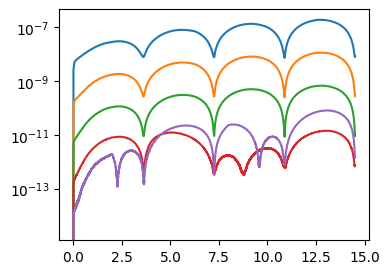

In [134]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t1,er1)
plt.plot(t2,er2)
plt.plot(t3,er3)
plt.plot(t4,er4)
plt.plot(t5,er5)
plt.yscale('log')

In [142]:
t1

array([0.00000000e+00, 7.85398163e-03, 1.57079633e-02, ...,
       1.44984501e+01, 1.45063041e+01, 1.45141581e+01])

In [143]:
t2

array([0.00000000e+00, 3.92699082e-03, 7.85398163e-03, ...,
       1.45063041e+01, 1.45102311e+01, 1.45141581e+01])

In [147]:
t1[1]-t3[4]

0.007853981633974483

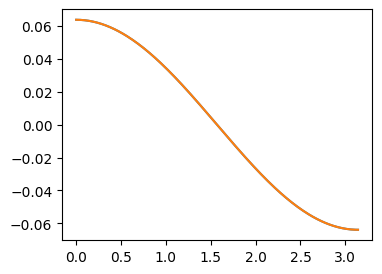

In [137]:
fig = plt.figure(figsize=(4, 3))
plt.plot(wave_eq1._x,wave1[int(T / 8 / wave_eq1._dt),0,:])
plt.plot(wave_eq1._x,f_sol(wave_eq1._x,t1[int(T / 8 / wave_eq1._dt+wave_eq1._dt)]))
##plt.plot(wave_eq3._dx,er3)
#plt.plot(wave_eq4._dx,er4)
#plt.plot(wave_eq5._dx,er5)